In [ ]:
#ETAPA 1.0 - LOAD
import pandas as pd
url  = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados_normalizados = pd.json_normalize(dados.to_dict(orient='records'))

In [ ]:
#ETAPA 2.0 - TRANSFORM
print('1 - Explorar as colunas do dataset e verificar seus tipos de dados.')
dados_normalizados.info()

print('\n3 - Consultar o dicionário para entender melhor os significados das variáveis.')
display(dados_normalizados['Churn'].value_counts())


1 - Explorar as colunas do dataset e verificar seus tipos de dados.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
#ETAPA 2.1 - TRANSFORM

print(f"Linhas duplicadas: {dados_normalizados.duplicated().sum()}")
print(f"\nLinhas nulas: {dados_normalizados.isna().sum()}")
print('\nResultados distintos por coluna')
for col in dados_normalizados.columns:
    print('\nColuna:'+ col)
    print(dados_normalizados[col].unique()[:20])

#Verificando STRINGS vazias, espaços e caracteres problemáticos
print("\nStrings vazias:")
print((dados_normalizados == '').sum().sort_values(ascending=False))

print("\nEspaços em branco:")
print((dados_normalizados == ' ').sum().sort_values(ascending=False))

print("\nInterrogações como valores:")
print((dados_normalizados == '?').sum().sort_values(ascending=False))

Linhas duplicadas: 0

Linhas nulas: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Resultados distintos por coluna

Coluna:customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'
 '0017-DINOC' '0017-IUDMW' '0018-NYROU' '0019-EFAEP' '0019-GFNTW'
 '0020-INWCK' '0020-JDNXP' '0021-IKXGC' '0022-TCJC

In [ ]:
#ETAPA 2.2 - TRANSFORM


#Faço a tratativa do nome das colunas
dados_normalizados.columns = [col.split('.')[-1] for col in dados_normalizados.columns]

#Retira valores vazios do churn ,como o objetivo da analise é entender os casos que tivemos de Churn, estou retirando os casos que não sabemos se são ou não Churn, tornando a analise mais assertiva.
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != '']

#Não foi retirado traços nem parenteses e nem alterados as formatações dos campos porque não vi necessidade realizar essas tratativas, os dados em si não estava com duplicidade por case sensitive então não achei necessário realizar alterações quanto á isso.

#o campo de total foi recalculado, lendo o dicionário entendi que o campo total é tudo que o cliente ja pagou, mas em paralelo temos o valor da mensalidade e quantas vezes foram pagos, utilizando os dados que vinha no arquivo o total não batia calculado individualmente os casos
dados_normalizados['Total'] = dados_normalizados['Monthly'] * dados_normalizados['tenure']

#correção dos tipos dos campos existentes, coloquei outros campos além do churn para facilitar possivel analises a partir dos demais campos que tem apenas Yes ou No como valor
for col in ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']:
  dados_normalizados[col] = dados_normalizados[col].map({'Yes':1,'No':0})




In [ ]:
#ETAPA 3.0 -  LOAD & ANALYSIS

#Análise Descritiva
dados_normalizados.describe()



,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Monthly,Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.581350
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2264.729447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,394.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1393.600000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.100000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8550.000000


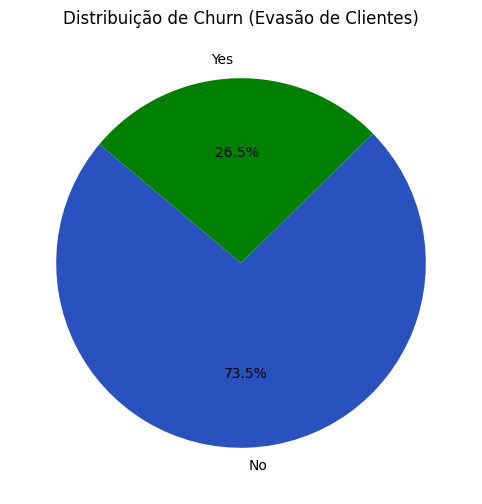

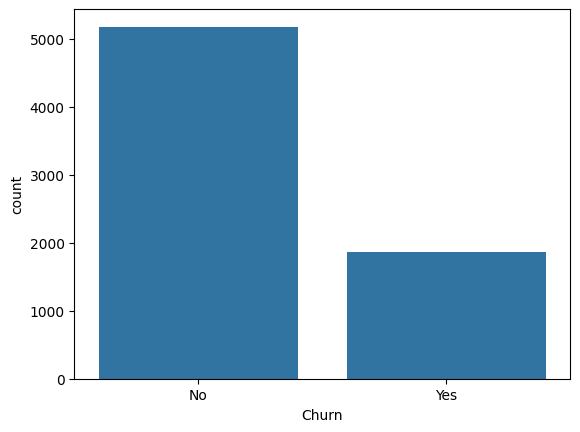

In [17]:
#ETAPA 3.1 -  LOAD & ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

# 1. realiza a contagem dos dados de churn e remapeia 1 e 0 para Yes ou No, para deixar as legendas mais amigaveis
contagem = dados_normalizados['Churn'].map({1:'Yes',0:'No'}).value_counts()

# 2. Criar o gráfico
plt.figure(figsize=(8, 6))
plt.pie(contagem,
        labels=contagem.index,
        autopct='%1.1f%%', # Mostra a porcentagem com uma casa decimal
        startangle=140,    # Rotaciona o gráfico para um melhor ângulo
        colors=['#2A52BE','green']) # Cores personalizadas (Azul e Vermelho claro)

plt.title('Distribuição de Churn (Evasão de Clientes)')
plt.show()

# Cria o gráfico contando automaticamente os valores da coluna
sns.countplot(x=dados_normalizados['Churn'].map({1: 'Yes', 0: 'No'}))

# Exibe o gráfico
plt.show()

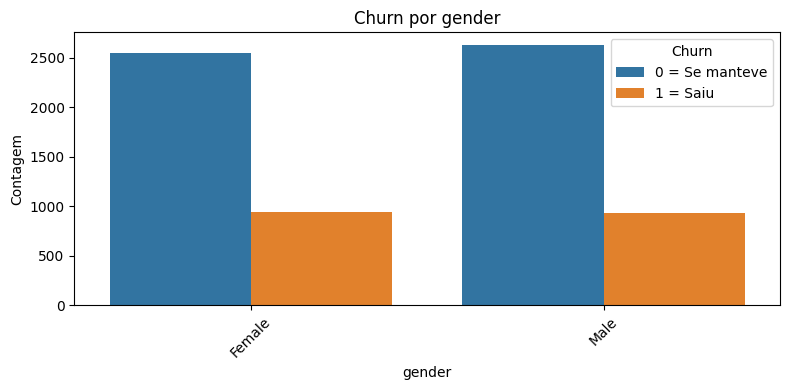

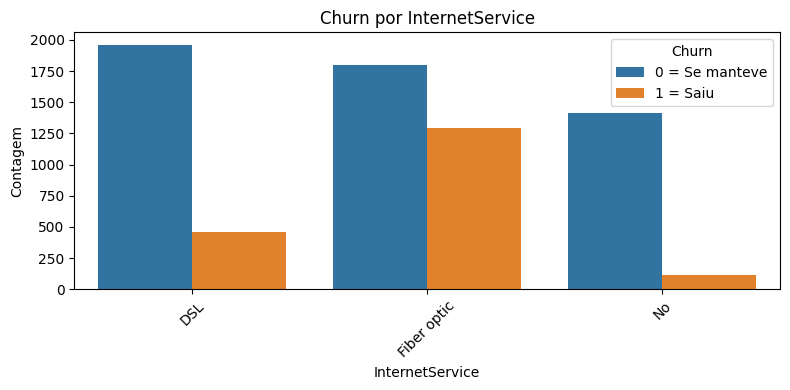

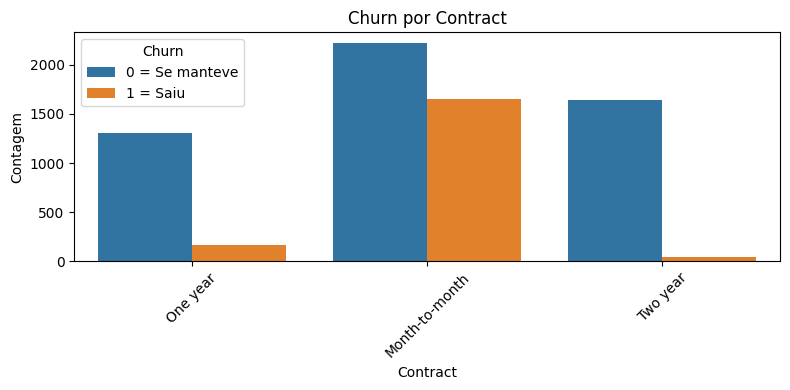

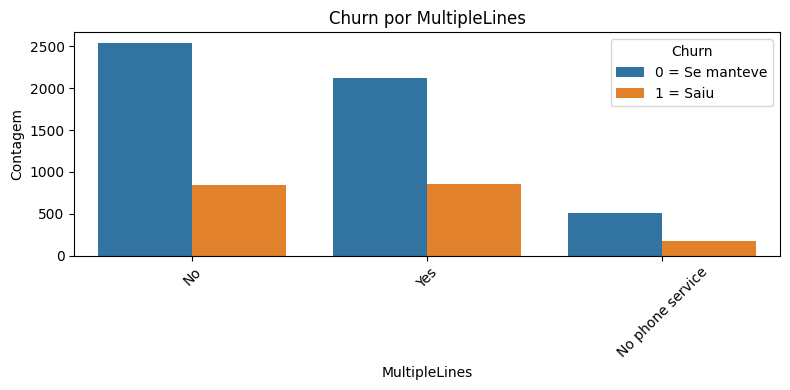

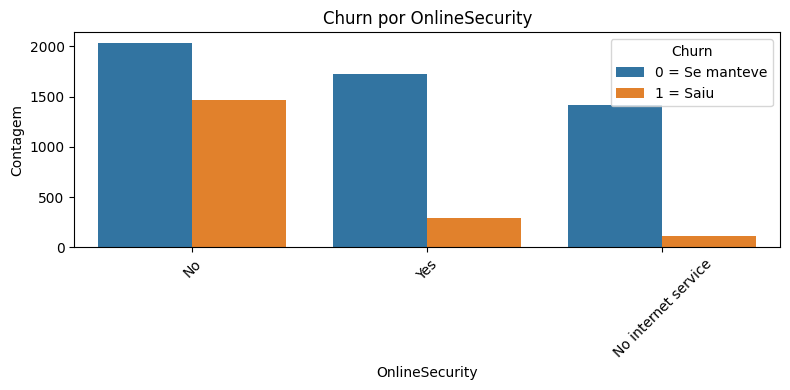

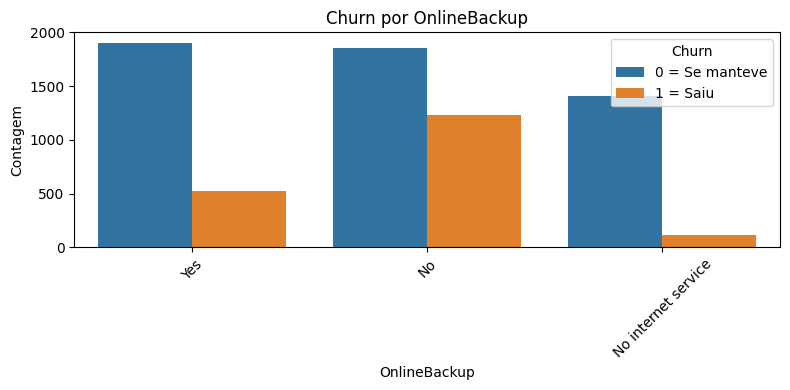

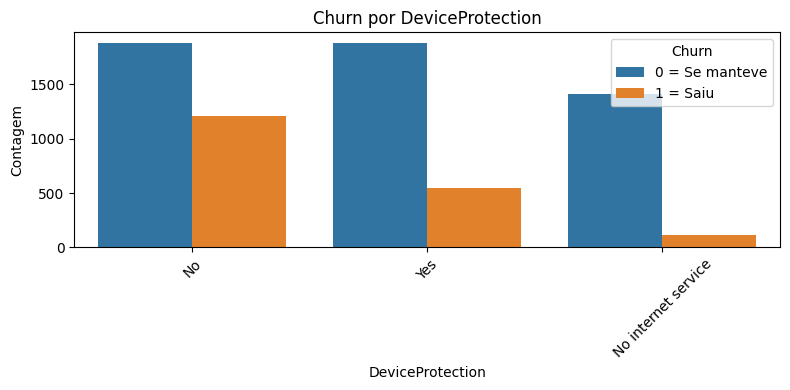

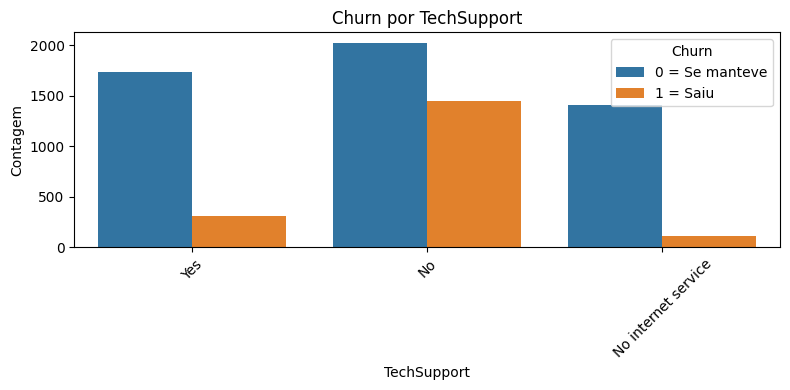

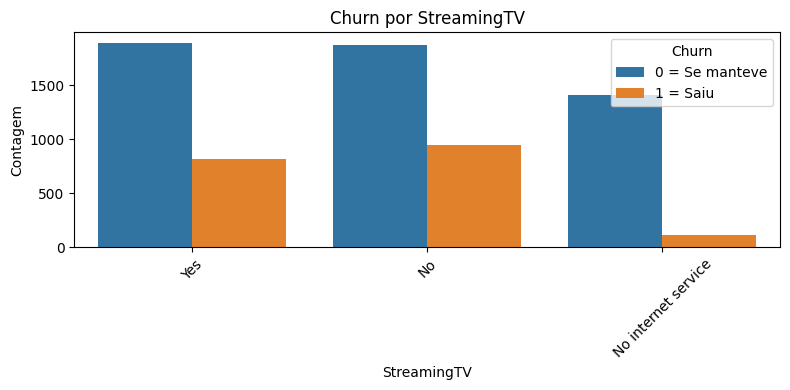

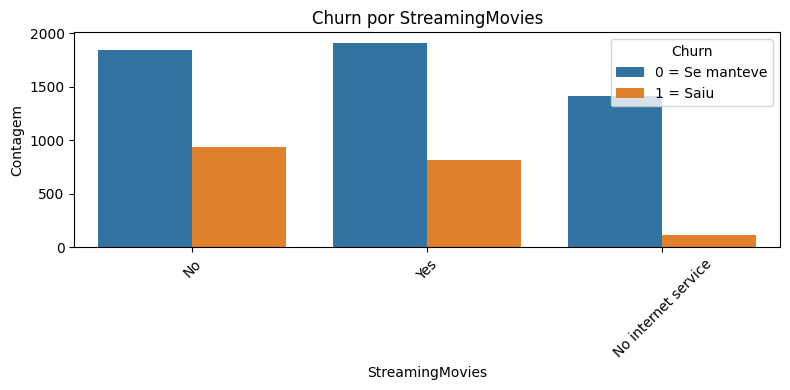

In [ ]:
 #ETAPA 3.2 -  LOAD & ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

def churn_por_categoria(df, coluna):
    plt.figure(figsize=(8,4))
    sns.countplot(data=dados_normalizados, x=coluna, hue="Churn")
    plt.title(f"Churn por {coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=["0 = Se manteve", "1 = Saiu"])
    plt.tight_layout()
    plt.show()


#Criação de gráfcos por categoria
categorias = [
    "gender",
    "InternetService",
    "Contract",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for coluna in categorias:
    churn_por_categoria(dados_normalizados, coluna)


In [18]:
#ETAPA 3.3 -  LOAD & ANALYSIS

import plotly.express as px

dado_agrupado = dados_normalizados.groupby(['tenure', 'Churn'])['Total'].mean().reset_index()

# 1.Criação gráfico de linhas
fig = px.line(dado_agrupado,
              x="tenure",
              y="Total",
              color=dado_agrupado['Churn'].map({1: 'Yes', 0: 'No'}),
              title='Média de Total Pago por Meses de Contrato (Tenure)',
              labels={'tenure': 'Meses de Contrato', 'Total': 'Média de Total Pago', 'color': 'Churn'})

fig.show()

dado_agrupado1 = dados_normalizados.groupby(['Churn'])['Total'].sum().reset_index()

# 2. Criação o gráfico de barras
fig = px.bar(dado_agrupado1,
              x=dado_agrupado1['Churn'].map({1: 'Yes', 0: 'No'}),
              y="Total",
              color=dado_agrupado1['Churn'].map({1: 'Yes', 0: 'No'}),
              title='Total Pago por clientes que se tornaram Churn x clientes que permanecem clientes',
              labels={ 'Total': 'Total Pago', 'color': 'Churn'})

fig.show()

#RELATÓRIO FINAL


#1. Introdução

Este relatório apresenta uma análise aprofundada sobre o fenômeno de evasão de clientes (Churn) na TelecomX. Como uma provedora de serviços de telecomunicações, a empresa enfrenta um aumento no volume de cancelamentos, o que impacta diretamente a receita e o crescimento sustentável.

Objetivos do Estudo:

Identificar padrões comportamentais associados ao cancelamento;

Traçar o perfil dos clientes com maior propensão à evasão;

Detectar gargalos em serviços e condições contratuais;

Fornecer insights estratégicos para retenção e fidelização.

A análise segue o fluxo ETL (Extração, Transformação e Carga) e finaliza com a Exploração de Dados (EDA).

#2. Preparação e Limpeza dos Dados

##2.1 - Importação e Estruturação

A coleta dos dados foi dividida em três etapas fundamentais para garantir a integridade da fonte:

Conexão: Atribuição do endpoint da API a uma variável global.

Leitura: Utilização do método pd.read_json da biblioteca Pandas.

Normalização: Aplicação do json_normalize para transformar dicionários aninhados em um DataFrame estruturado (tabular).

##2.2 - Limpeza
Antes de manipular os dados, realizei uma auditoria para identificar caracteres especiais (como '?'), valores nulos, duplicados ou campos vazios.

Auditoria de Valores: Implementação de um laço for para inspecionar os valores únicos de cada coluna (limitado aos 20 primeiros resultados).

Tratamento de Churn: Identifiquei que registros com o campo Churn vazio comprometeriam a acurácia do modelo. Portanto, esses registros foram removidos para garantir que a análise se baseie apenas em eventos confirmados.

##2.3 - Engenharia de Dados (Tratativa)
Para otimizar o DataFrame, realizei três intervenções críticas:

Padronização de Colunas: Após a normalização, os nomes das colunas continham prefixos do aninhamento JSON. Apliquei uma função de limpeza para manter apenas o nome final do campo (ex: customer.gender tornou-se gender).

Recálculo do Faturamento: Notei inconsistências entre o campo TotalCharges e o produto de Tenure (meses de contrato) por MonthlyCharges. Optei por recalcular o Total Pago para corrigir as discrepâncias e preencher lacunas de dados que estavam em branco.

Codificação Binária: Converti os campos categóricos "Yes" e "No" para formato binário (1 e 0), permitindo a execução de cálculos estatísticos e modelos matemáticos.

#3. Análise Exploratória de Dados (EDA)
###3.1 - Estatística Descritiva
Utilizei o método .describe() para extrair métricas de tendência central (média, mediana) e dispersão (desvio padrão), estabelecendo uma visão inicial da amplitude das cobranças e do tempo de casa dos clientes.

###3.2 - Visualização da Evasão
Criei gráficos de pizza e barras para quantificar o Churn. Enquanto a pizza evidencia a proporção do problema em relação ao todo, as barras facilitam a visualização da contagem absoluta de clientes perdidos.

###3.3 - Análise por Segmento Categórico
Automatizei a criação de gráficos de barras para todas as variáveis categóricas que não foram convertidas para números binários. Isso permitiu identificar rapidamente quais serviços (como tipo de internet ou suporte técnico) possuem as maiores taxas de cancelamento.

###3.4 - Análise Financeira e Temporal
Desenvolvi dois cruzamentos estratégicos:

Evolução do Gasto: Um gráfico de linhas relacionando Tenure (X) e Total Pago (Y), segmentado por Churn. Isso revelou o comportamento financeiro do cliente ao longo do tempo.

Impacto Financeiro: Gráfico de barras comparando o volume financeiro total entre clientes ativos e retidos.

#4. Conclusões e Insights
A análise cruzada revelou um padrão crítico: embora o volume total de receita venha de clientes ativos, o ticket médio dos clientes que entram em Churn é superior ao dos clientes que permanecem. Isso indica que estamos perdendo nossos clientes de maior valor unitário.

Principais Descobertas:

Gargalo na Fibra Óptica: Clientes de fibra óptica possuem um ticket médio alto, mas apresentam alta evasão. O fato de não contratarem serviços de segurança e suporte técnico sugere que a experiência de uso é instável ou o atendimento é demorado, gerando frustração.

Frustração no Suporte: A falta de serviços de suporte premium parece ser um catalisador para o cancelamento de clientes com contas caras.

Fragilidade Contratual: Contratos do tipo "mês a mês" (month-to-month) concentram a maioria dos cancelamentos, funcionando como uma porta de saída facilitada para clientes insatisfeitos ou compras por impulso.

#5. Recomendações Estratégicas
Downselling Preventivo: Criar gatilhos para que o time de retenção ofereça planos de menor valor para clientes de alto ticket que demonstrem sinais de insatisfação. É preferível manter um cliente com ticket menor do que perdê-lo totalmente.

Venda Consultiva de Suporte: Reforçar a venda casada (bundle) de serviços de segurança e suporte técnico para usuários de Fibra Óptica, focando na garantia de estabilidade e rapidez no atendimento.

Incentivo à Fidelidade: Implementar políticas de desconto ou benefícios exclusivos para a migração de contratos mensais para contratos anuais ou bianuais, reduzindo a volatilidade da base.